In [1]:
!pip install uproot awkward lz4 xxhash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 KB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.8 MB/s eta 0:00:00


In [2]:
import uproot
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math 


In [4]:
#In order to make a plot of the total momentum of each of the three daughters, the 3 Cartesian components of the momentum have to be defined as individual lines of code. With H1 being of interest to our task.

xmomentum = f["DecayTree/H1_PX"].array()
ymomentum = f["DecayTree/H1_PY"].array()
zmomentum = f["DecayTree/H1_PZ"].array()



In [5]:
#To construct H1_Ptot, we will use the Pythagorean theorem to sum up the components of H1 into one list of values. The square of the components will be named as ..._comp. E.g., z_comp = zmomentum **2
z_comp = zmomentum ** 2 
y_comp = ymomentum ** 2 
x_comp = xmomentum ** 2

H1_Ptot_squared = []

for i in range(len(x_comp)):
  H1_Ptot_squared.append(x_comp[i] + y_comp[i] + z_comp[i])

#The above for loop is used to sum up all the squared components up. While the code below obtains the actual list for H1_Ptot. 

H1_Ptot = []

for n in range(len(x_comp)):
  H1_Ptot.append(math.sqrt(H1_Ptot_squared[n]))



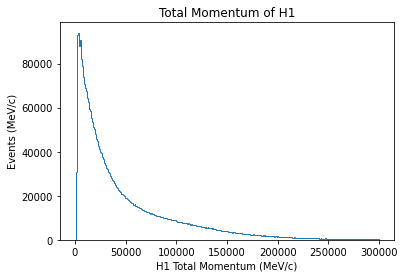

In [6]:
#After obtaining H1_Ptot, plt.hist() is used to obtain a plot of the total momentum of the first daughter particle. bins = 'auto' automatically fits the y-axis of the graph with the data. histtype = 'step' makes sure that the plot is not filled under the curve.
plt.hist(H1_Ptot, bins ='auto', range = (0,300000), histtype='step')
plt.xlabel('H1 Total Momentum (MeV/c^2)')
plt.ylabel('Events (MeV/c^2)')
plt.title('Total Momentum of H1')
plt.show()

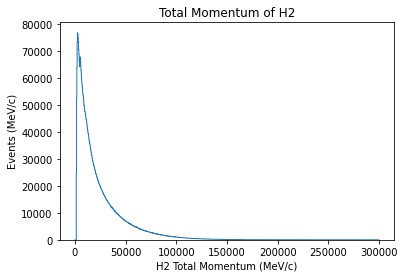

In [7]:
#For the total momentum of the second daughter particle, most of the same step is repeated. Only this time with H2_PX, H2_PY and H2_PZ to get H2_Ptot.
xmomentum_h2 = f["DecayTree/H2_PX"].array()
ymomentum_h2 = f["DecayTree/H2_PY"].array()
zmomentum_h2 = f["DecayTree/H2_PZ"].array()

z_comp_h2 = zmomentum_h2 ** 2 
y_comp_h2 = ymomentum_h2 ** 2 
x_comp_h2 = xmomentum_h2 ** 2

H2_Ptot_squared = []

for i in range(len(x_comp_h2)):
  H2_Ptot_squared.append(x_comp_h2[i] + y_comp_h2[i] + z_comp_h2[i])

H2_Ptot = []

for n in range(len(x_comp_h2)):
  H2_Ptot.append(math.sqrt(H2_Ptot_squared[n]))

plt.hist(H2_Ptot, bins ='auto', range = (0,300000), histtype='step')
plt.xlabel('H2 Total Momentum (MeV/c^2)')
plt.ylabel('Events (MeV/c^2)')
plt.title('Total Momentum of H2')
plt.show()

#Note: As with the code for the first daughter particle total momentum, the for loop used for H2_Ptot makes this chunk of code take quite a bit of time to run. On my personal PC the entire code I wrote for H2_Ptot (up to the final line to show the plot) took 5 minutes and 25 seconds to run.

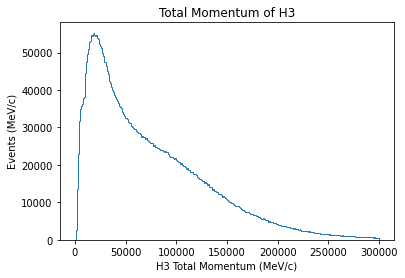

In [8]:
#For the third daughter particle, the same steps are repeated. Only this time with H3_PX, H3_PY, H3_PZ and H3_Ptot.
xmomentum_h3 = f["DecayTree/H3_PX"].array()
ymomentum_h3 = f["DecayTree/H3_PY"].array()
zmomentum_h3 = f["DecayTree/H3_PZ"].array()

z_comp_h3 = zmomentum_h3 ** 2 
y_comp_h3 = ymomentum_h3 ** 2 
x_comp_h3 = xmomentum_h3 ** 2

H3_Ptot_squared = []

for i in range(len(x_comp_h3)):
  H3_Ptot_squared.append(x_comp_h3[i] + y_comp_h3[i] + z_comp_h3[i])

H3_Ptot = []

for n in range(len(x_comp_h3)):
  H3_Ptot.append(math.sqrt(H3_Ptot_squared[n]))

plt.hist(H3_Ptot, bins ='auto', range = (0,300000), histtype='step')
plt.xlabel('H3 Total Momentum (MeV/c^2)')
plt.ylabel('Events (MeV/c^2)')
plt.title('Total Momentum of H3')
plt.show()

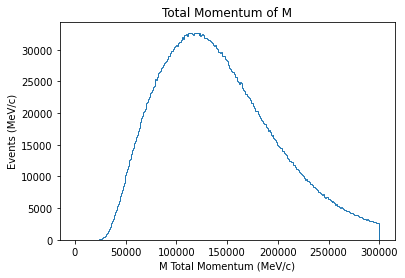

In [9]:
#To obtain the momentum of the mother particle (M_Ptot), an array needs to be made that consists out of the sum of H1_Ptot, H2_Ptot, and H3_Ptot. 
M_Ptot = []

for i in range(len(H1_Ptot)):
  sum = H1_Ptot[i] + H2_Ptot[i] + H3_Ptot[i]
  M_Ptot.append(sum)

plt.hist(M_Ptot, bins ='auto', range = (0,300000), histtype='step')
plt.xlabel('M Total Momentum (MeV/c^2)')
plt.ylabel('Events (MeV/c^2)')
plt.title('Total Momentum of M')
plt.show()

In [15]:
f["DecayTree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

In [10]:
#Obtaining a histogram of the mass distribution of the mother particle (in our case a B meson) means that we will have to use the energy-momentum conservation equation. 

#First we need to calculate the energies of the three daughter particles. For this, we assume that the mass of the K is 493 MeV/c^2. For the moment, disregarding the error this might give as to the mass of the B meson we will obtain. We will call the energy of the respective Kaons E1, E2, E3. Using the equation E = sqrt(p^2 + m^2)
kaon_mass = 493

E1_squared = []
for i in H1_Ptot_squared:
  E1_squared.append(i + (kaon_mass)**2)

E1 = []
for x in E1_squared:
  E1.append(math.sqrt(x))

E2_squared = []
for i in H2_Ptot_squared:
  E2_squared.append(i + (kaon_mass)**2)

E2 = []
for x in E2_squared:
  E2.append(math.sqrt(x))

E3_squared = []
for i in H3_Ptot_squared:
  E3_squared.append(i + (kaon_mass)**2)

E3 = []
for x in E3_squared:
  E3.append(math.sqrt(x))


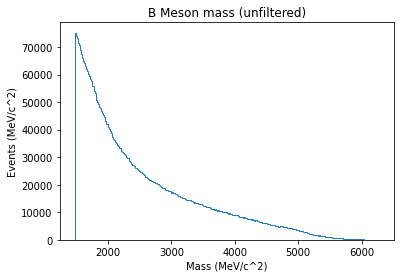

In [41]:
#Now that we have the energies of the three kaons, we will add them together to get the energy of the B meson.

E_Bmeson = []
for i in range(len(E1)):
  sum_E = E1[i] + E2[i] + E3[i]
  E_Bmeson.append(sum_E)

#To get a mass distribution of the B meson, we need the square of E_Bmeson and M_Ptot. As the equation for the mass is M_Bmeson = sqrt(E_Bmeson**2 - M_Ptot**2).
#E_Bmeson_squared can be easily obtained using list comprehension syntax. 
E_Bmeson_squared = [i ** 2 for i in E_Bmeson]

#The next line creates M_Ptot**2.
M_Ptot_squared = [x ** 2 for x in M_Ptot]

#The square of the mass of the B meson can be obtained now as a new list. M_Bmeson_squared.
M_Bmeson_squared = []
for q in range(len(E_Bmeson_squared)):
  M_Bmeson_squared.append(E_Bmeson_squared[q] - M_Ptot_squared[q])

#Lastly, we will write our line for M_Bmeson.
M_Bmeson = [math.sqrt(i) for i in M_Bmeson_squared]

#To plot the (unfiltered) mass distribution, we will use the same histogram plotting method as before.
plt.hist(M_Bmeson, bins ='auto', histtype='step')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events (MeV/c^2)')
plt.title('B Meson mass (unfiltered)')
plt.show()
#The result is quite far from what one would expect to observe in theory. Also, as with the momentum histograms, the event units heavily depend on the bin values used for the histogram. Thus, it is important to remain consistent and not switch from MeV/c^2 to GeV/c^2 without explicit indication.


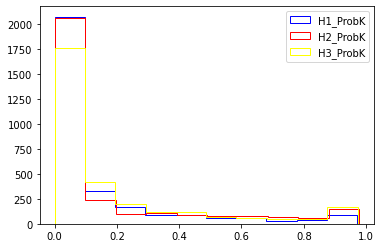

In [42]:
#The following lines code for H1/H2/H3 _ProbK. Where a range of 0 to 3000 was chosen for clearer illustration.
plt.hist(f["DecayTree/H1_ProbK"].array()[0:3000], label = 'H1_ProbK', color='blue', histtype='step')
plt.hist(f["DecayTree/H2_ProbK"].array()[0:3000], label = 'H2_ProbK', color='red', histtype='step')
plt.hist(f["DecayTree/H3_ProbK"].array()[0:3000], label = 'H3_ProbK', color='yellow', histtype='step')
plt.legend()
plt.show()


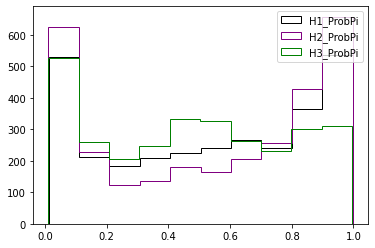

In [43]:
#For the H1/H2/H3 _ProbPi, the same steps as for the _ProbK are repeated with the same range.
plt.hist(f["DecayTree/H1_ProbPi"].array()[0:3000], label = 'H1_ProbPi', color='black', histtype='step')
plt.hist(f["DecayTree/H2_ProbPi"].array()[0:3000], label = 'H2_ProbPi', color='purple', histtype='step')
plt.hist(f["DecayTree/H3_ProbPi"].array()[0:3000], label = 'H3_ProbPi', color='green', histtype='step')
plt.legend()
plt.show()


(array([291., 372., 378., 339., 336., 284., 266., 288., 227., 219.]),
 array([3.52633120e-03, 1.20313755e+00, 2.40274877e+00, 3.60235999e+00,
        4.80197122e+00, 6.00158244e+00, 7.20119366e+00, 8.40080488e+00,
        9.60041610e+00, 1.08000273e+01, 1.19996385e+01]),
 [<matplotlib.patches.Polygon at 0x7f44946defd0>])

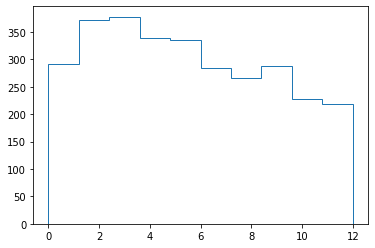

In [14]:
#To obtain a histogram of the B vertex chi squared corresponding to the three charged tracks, a similar code can be written using B_VertexChi2 from Decay Tree.
plt.hist(f["DecayTree/B_VertexChi2"].array()[0:3000], histtype='step')

In [31]:
#In order to start filtering the results to obtain meaningful data, we can start by making a selection from our data to match it with potential high likelihood of significant events. This means that we want a high probability for each of the daughter particles to be a kaon in the case of a B meson production. In addition, we don't want any of our daughter particles to be muons.
#The second line of code shows how you can create a variable 'tree' using uproot instead of ROOT.

selection = "(H1_ProbK > 0.9) & (H2_ProbK > 0.9) & (H3_ProbK > 0.9) & (~H1_isMuon) & (~H2_isMuon) & (~H3_isMuon)"

tree=f["DecayTree"].arrays(cut=selection)

#To get M_Bmeson_cut, we will need to do the same calculations we did before for M_Bmeson. But now using the data tree["Data"].
xmomentum_cut = tree["H1_PX"]
ymomentum_cut = tree["H1_PY"]
zmomentum_cut = tree["H1_PZ"]

z_com = zmomentum_cut ** 2 
y_com = ymomentum_cut ** 2 
x_com = xmomentum_cut ** 2

H1_Ptot_sqr = []

for i in range(len(x_com)):
  H1_Ptot_sqr.append(x_com[i] + y_com[i] + z_com[i])

H1_Ptot_cut = []

for n in range(len(x_com)):
  H1_Ptot_cut.append(math.sqrt(H1_Ptot_sqr[n]))

xmomentum_h2_cut = tree["H2_PX"]
ymomentum_h2_cut = tree["H2_PY"]
zmomentum_h2_cut = tree["H2_PZ"]

z_com_h2 = zmomentum_h2_cut ** 2 
y_com_h2 = ymomentum_h2_cut ** 2 
x_com_h2 = xmomentum_h2_cut ** 2

H2_Ptot_sqr = []

for i in range(len(x_com_h2)):
  H2_Ptot_sqr.append(x_com_h2[i] + y_com_h2[i] + z_com_h2[i])

H2_Ptot_cut = []

for n in range(len(x_com_h2)):
  H2_Ptot_cut.append(math.sqrt(H2_Ptot_sqr[n]))

xmomentum_h3_cut = tree["H3_PX"]
ymomentum_h3_cut = tree["H3_PY"]
zmomentum_h3_cut = tree["H3_PZ"]

z_com_h3 = zmomentum_h3_cut ** 2 
y_com_h3 = ymomentum_h3_cut ** 2 
x_com_h3 = xmomentum_h3_cut ** 2

H3_Ptot_sqr = []

for i in range(len(x_com_h3)):
  H3_Ptot_sqr.append(x_com_h3[i] + y_com_h3[i] + z_com_h3[i])

H3_Ptot_cut = []

for n in range(len(x_com_h3)):
  H3_Ptot_cut.append(math.sqrt(H3_Ptot_sqr[n]))

M_Ptot_cut = []

for i in range(len(H1_Ptot_cut)):
  sum_cut = H1_Ptot_cut[i] + H2_Ptot_cut[i] + H3_Ptot_cut[i]
  M_Ptot_cut.append(sum_cut)

E1_squared_cut = []
for i in H1_Ptot_sqr:
  E1_squared_cut.append(i + (kaon_mass)**2)

E1_cut = []
for x in E1_squared_cut:
  E1_cut.append(math.sqrt(x))

E2_squared_cut = []
for i in H2_Ptot_sqr:
  E2_squared_cut.append(i + (kaon_mass)**2)

E2_cut = []
for x in E2_squared_cut:
  E2_cut.append(math.sqrt(x))

E3_squared_cut = []
for i in H3_Ptot_sqr:
  E3_squared_cut.append(i + (kaon_mass)**2)

E3_cut = []
for x in E3_squared_cut:
  E3_cut.append(math.sqrt(x))

E_Bmeson_cut = []
for i in range(len(E1_cut)):
  sum_E_cut = E1_cut[i] + E2_cut[i] + E3_cut[i]
  E_Bmeson_cut.append(sum_E_cut)

E_Bmeson_sqr = [i ** 2 for i in E_Bmeson_cut] #E_Bmeson_sqr is the square of E_Bmeson_cut. Same will be done for M_Ptot_cut.
M_Ptot_sqr = [x ** 2 for x in M_Ptot_cut]

M_Bmeson_sqr = []
for q in range(len(E_Bmeson_sqr)):
  M_Bmeson_sqr.append(E_Bmeson_sqr[q] - M_Ptot_sqr[q])

M_Bmeson_cut = [math.sqrt(i) for i in M_Bmeson_sqr]



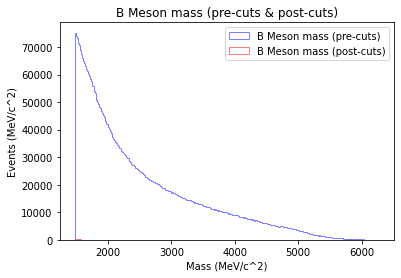

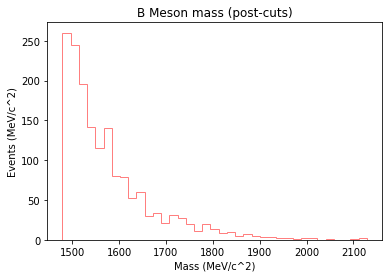

In [47]:
#Now we will plot a histogram of B meson mass pre-cuts and post-cuts.
plt.hist(M_Bmeson, label = 'B Meson mass (pre-cuts)', bins = 'auto', alpha = 0.5, color = 'blue', histtype='step')
plt.hist(M_Bmeson_cut, label = 'B Meson mass (post-cuts)', bins = 'auto', alpha = 0.5, color = 'red', histtype='step')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events (MeV/c^2)')
plt.title('B Meson mass (pre-cuts & post-cuts)')
plt.legend()
plt.show()


#By running this code, one can notice that M_Bmeson_cut produces a significantly smaller histogram plot compared to the pre-cut M_Bmeson. To view more accurately that this indeed resembles a cut B meson mass, one can run the code seperately (as shown below) and see that it indeed resembles the same shape as the pre-cut B meson mass. But at much smaller y and x axis intervals.
plt.hist(M_Bmeson_cut, bins = 'auto', alpha = 0.5, color = 'red', histtype='step')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events (MeV/c^2)')
plt.title('B Meson mass (post-cuts)')
plt.show()

#Note: It is important to emphasize that the bins used to create these histograms are crucial if intended for scientific purposes. The fact that I have used bins = 'auto' in the first histogram (as well as the second) very likely influences the conclusions that could be made from the data. Nevertheless, I used this in order to make a clear graph showing the mass distribution both pre- and post-cuts.

In [ ]:
#I was not able to unfortunately complete the full assignment and write out the calculations for the number of events counting. However, I still found this assignment to be very educational in terms of working with a new Python library (uproot) as well as manipulating big data from large experiments such as the ones at CERN.